# Solar home half-hour data 2012-2013
#### Exploring household energy data by consumption, by generating (solar panel) by hourly, weekly, monthly, yearly, winter, summer.
* Keyword explanations (from PDF file with the data)

  *  **Generator Capacity**: Solar panel capacity recorded on the application for connection for each customer.
  *  **Consumption Category**:
      * GC:General Consumption for electricity supplied all the time excluding solar generation and controlled load supply
      * CL:Controlled Load Consumption (**Only in Australia**)
      * GG:Gross Generation for electricity generated by the solar system with a gross metering configuration, measured separately to household loads 
  * **Half-hourly data**: Kilowatt hours (kWh) of electrical energy consumed or generated in the half hour ending at 0:30 (eg. between 0:00 and 0:30).\
  The value is positive regardless of whether it is consumption or generation. 
  

### Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [2]:
df=pd.read_csv(r"C:\Users\baiga\Documents\0 Final project\Solar home half-hour data - 1 July 2012 to 30 June 2013\2012-2013 Solar home electricity data v2.csv")

In [3]:
df

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,29/06/2013,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,NaN
268553,300,3.36,2086,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
268554,300,3.36,2086,CL,30/06/2013,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,NaN
268555,300,3.36,2086,GC,30/06/2013,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,NaN


Check missing values.

In [4]:
df.isnull().values.ravel().sum()

268557

In [5]:
df.isnull().count()

Customer                268557
Generator Capacity      268557
Postcode                268557
Consumption Category    268557
date                    268557
0:30                    268557
1:00                    268557
1:30                    268557
2:00                    268557
2:30                    268557
3:00                    268557
3:30                    268557
4:00                    268557
4:30                    268557
5:00                    268557
5:30                    268557
6:00                    268557
6:30                    268557
7:00                    268557
7:30                    268557
8:00                    268557
8:30                    268557
9:00                    268557
9:30                    268557
10:00                   268557
10:30                   268557
11:00                   268557
11:30                   268557
12:00                   268557
12:30                   268557
13:00                   268557
13:30                   268557
14:00   

Row Quality column is entirely NAN, we can drop late.

In [6]:
len(df['Customer'].value_counts())

300

**300** customers data in 2013-2014.

In [15]:
len(df[df['Customer']==1])

1095

For 1 customer there are **1095** entries.

In [16]:
df['Postcode'].value_counts()

2259    27862
2261    18615
2290    11997
2262     7665
2093     7300
        ...  
2088      730
2031      730
2154      730
2025      730
2111      730
Name: Postcode, Length: 100, dtype: int64

In [18]:
df[df['Postcode']==2026]

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
10707,11,2.04,2026,GC,1/07/2012,0.567,0.547,0.613,0.519,0.314,...,0.583,0.664,0.576,0.643,0.536,0.562,0.559,0.314,0.353,NaN
10708,11,2.04,2026,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,NaN
10709,11,2.04,2026,GC,2/07/2012,0.291,0.318,0.304,0.315,0.334,...,1.203,0.919,0.829,0.821,1.578,0.837,0.530,0.349,0.307,NaN
10710,11,2.04,2026,GG,2/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
10711,11,2.04,2026,GC,3/07/2012,0.303,0.317,0.291,0.318,0.336,...,0.301,0.333,0.288,0.315,0.293,0.298,0.410,0.569,0.360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245423,275,2.04,2026,GG,28/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
245424,275,2.04,2026,GC,29/06/2013,0.125,0.213,0.137,0.113,0.188,...,0.381,0.725,0.294,0.406,0.288,0.369,0.294,0.350,0.344,NaN
245425,275,2.04,2026,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
245426,275,2.04,2026,GC,30/06/2013,0.131,0.156,0.125,0.088,0.163,...,0.413,0.913,2.756,2.294,0.188,0.088,0.125,0.194,0.106,NaN


We use this particular Postcode=2026, CustomerID=11 for choosing models.

In [26]:
df['Consumption Category'].value_counts()

GG    109419
GC    109419
CL     49719
Name: Consumption Category, dtype: int64

In [27]:
df[df['Customer']==1]['Consumption Category'].value_counts()

CL    365
GC    365
GG    365
Name: Consumption Category, dtype: int64

For 1 customer, 365(1 year) data by category.

In [28]:
df[df['Customer']==1]['date'].nunique()

365

In [29]:
df[df['Customer']==1]['Generator Capacity'].value_counts()

3.78    1095
Name: Generator Capacity, dtype: int64

We have only 1 type of generator.

### 1. Daily consumption

Find GC General consumption un-controlled load.

In [30]:
gc_d=df[(df['Consumption Category']=="GC") & (df["Customer"]==11)]
gc_d.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
10707,11,2.04,2026,GC,1/07/2012,0.567,0.547,0.613,0.519,0.314,...,0.583,0.664,0.576,0.643,0.536,0.562,0.559,0.314,0.353,NaN
10709,11,2.04,2026,GC,2/07/2012,0.291,0.318,0.304,0.315,0.334,...,1.203,0.919,0.829,0.821,1.578,0.837,0.530,0.349,0.307,NaN
10711,11,2.04,2026,GC,3/07/2012,0.303,0.317,0.291,0.318,0.336,...,0.301,0.333,0.288,0.315,0.293,0.298,0.410,0.569,0.360,NaN
10713,11,2.04,2026,GC,4/07/2012,0.305,0.307,0.328,0.300,0.329,...,0.302,0.324,0.311,0.417,0.665,0.644,0.440,0.319,0.311,NaN
10715,11,2.04,2026,GC,5/07/2012,0.338,0.328,0.322,0.321,0.302,...,0.378,0.382,0.399,0.372,0.387,0.668,0.576,0.342,0.305,NaN


In [31]:
gc=gc_d.drop(columns=["Generator Capacity", "Postcode", "Consumption Category", "Customer", "Row Quality"])

In [32]:
gc

,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
10707,1/07/2012,0.567,0.547,0.613,0.519,0.314,0.324,0.301,0.343,0.332,...,0.533,0.583,0.664,0.576,0.643,0.536,0.562,0.559,0.314,0.353
10709,2/07/2012,0.291,0.318,0.304,0.315,0.334,0.312,0.316,0.306,0.295,...,0.708,1.203,0.919,0.829,0.821,1.578,0.837,0.530,0.349,0.307
10711,3/07/2012,0.303,0.317,0.291,0.318,0.336,0.298,0.304,0.295,0.314,...,0.296,0.301,0.333,0.288,0.315,0.293,0.298,0.410,0.569,0.360
10713,4/07/2012,0.305,0.307,0.328,0.300,0.329,0.275,0.356,0.323,0.311,...,0.313,0.302,0.324,0.311,0.417,0.665,0.644,0.440,0.319,0.311
10715,5/07/2012,0.338,0.328,0.322,0.321,0.302,0.327,0.318,0.341,0.328,...,0.428,0.378,0.382,0.399,0.372,0.387,0.668,0.576,0.342,0.305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427,26/06/2013,0.331,0.216,0.151,0.146,0.142,0.129,0.109,0.151,0.098,...,0.855,0.881,0.984,0.977,1.001,0.905,0.885,0.871,0.922,0.705
11429,27/06/2013,0.569,0.633,0.597,0.569,0.432,0.562,0.541,0.527,0.461,...,1.145,0.568,0.551,0.585,0.725,0.589,0.966,0.382,0.312,0.191
11431,28/06/2013,0.239,0.162,0.153,0.136,0.133,0.117,0.126,0.135,0.095,...,0.951,0.700,0.662,0.757,0.657,0.554,0.391,0.237,0.183,0.205
11433,29/06/2013,0.207,0.200,0.178,0.115,0.131,0.112,0.138,0.157,0.165,...,1.577,0.800,0.806,0.762,0.729,0.639,0.423,1.004,0.331,0.429


In [33]:
#Dropping header
# gc.columns = gc.iloc[0]
# gc.drop(gc.index[0], inplace=True)

In [34]:
#Reshaping DataFrame with hour.
gc_test=gc.melt(id_vars=["date"],
             var_name="hour")

In [35]:
gc_test

,date,hour,value
0,1/07/2012,0:30,0.567
1,2/07/2012,0:30,0.291
2,3/07/2012,0:30,0.303
3,4/07/2012,0:30,0.305
4,5/07/2012,0:30,0.338
...,...,...,...
17515,26/06/2013,0:00,0.705
17516,27/06/2013,0:00,0.191
17517,28/06/2013,0:00,0.205
17518,29/06/2013,0:00,0.429


In [36]:
#Merging 2 columns
gc_test["date1"] = gc_test["date"] + gc_test["hour"]

In [38]:
gc_test.head()

,date,hour,value,date1
0,1/07/2012,0:30,0.567,1/07/20120:30
1,2/07/2012,0:30,0.291,2/07/20120:30
2,3/07/2012,0:30,0.303,3/07/20120:30
3,4/07/2012,0:30,0.305,4/07/20120:30
4,5/07/2012,0:30,0.338,5/07/20120:30


In [39]:
#Converting to Datatime 
gc_test["date"]=gc_test["date1"].apply(lambda x: datetime.strptime(x, '%d/%m/%Y%H:%M'))

In [40]:
gc1=gc_test.sort_values(by=['date'])

In [41]:
gc1.drop(columns=["hour", "date1"], inplace=True)
gc1.head()

,date,value
17155,2012-07-01 00:00:00,0.353
0,2012-07-01 00:30:00,0.567
365,2012-07-01 01:00:00,0.547
730,2012-07-01 01:30:00,0.613
1095,2012-07-01 02:00:00,0.519
...,...,...
15694,2013-06-30 21:30:00,0.404
16059,2013-06-30 22:00:00,0.747
16424,2013-06-30 22:30:00,0.656
16789,2013-06-30 23:00:00,0.291


In [44]:
#Saving file into csv
gc1.to_csv("2012_customerID_11.csv",index=False)

### Exploring data for insight

In [18]:
gc[1.0].head()

Customer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0:30,0.855,0.309,0.092,0.081,0.445,0.056,0.497,0.171,0.517,0.994,...,0.031,0.083,0.069,0.912,0.092,0.815,0.107,0.072,0.597,0.031
1:00,0.786,0.082,0.076,0.082,0.255,0.105,0.203,0.253,0.190,0.738,...,0.098,0.047,0.059,0.854,0.047,0.865,0.028,0.077,0.526,0.111
1:30,0.604,0.059,0.318,0.306,0.138,0.289,0.107,0.148,0.285,0.616,...,0.030,0.070,0.066,0.145,0.102,0.930,0.161,0.076,0.594,0.031
2:00,0.544,0.097,0.088,0.098,0.115,0.103,0.058,0.441,0.190,0.857,...,0.096,0.058,0.060,0.138,0.037,0.857,0.132,0.070,0.124,0.109
2:30,0.597,0.290,0.061,0.725,0.071,0.043,0.090,0.154,0.268,0.615,...,0.036,0.057,0.067,0.618,0.110,0.449,0.117,0.081,0.176,0.030


In [21]:
gc_customerID_1=pd.DataFrame(gc[1.0])

Customer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0:30,0.855,0.309,0.092,0.081,0.445,0.056,0.497,0.171,0.517,0.994,...,0.031,0.083,0.069,0.912,0.092,0.815,0.107,0.072,0.597,0.031
1:00,0.786,0.082,0.076,0.082,0.255,0.105,0.203,0.253,0.190,0.738,...,0.098,0.047,0.059,0.854,0.047,0.865,0.028,0.077,0.526,0.111
1:30,0.604,0.059,0.318,0.306,0.138,0.289,0.107,0.148,0.285,0.616,...,0.030,0.070,0.066,0.145,0.102,0.930,0.161,0.076,0.594,0.031
2:00,0.544,0.097,0.088,0.098,0.115,0.103,0.058,0.441,0.190,0.857,...,0.096,0.058,0.060,0.138,0.037,0.857,0.132,0.070,0.124,0.109
2:30,0.597,0.290,0.061,0.725,0.071,0.043,0.090,0.154,0.268,0.615,...,0.036,0.057,0.067,0.618,0.110,0.449,0.117,0.081,0.176,0.030
3:00,0.612,0.155,0.160,1.046,0.406,0.159,0.372,0.220,0.510,0.677,...,0.140,0.123,0.113,0.689,0.093,0.163,0.085,0.120,0.881,0.166
3:30,1.245,0.703,0.950,1.584,0.736,0.700,0.728,0.800,1.122,1.275,...,0.647,0.646,0.663,1.154,0.698,1.054,0.693,0.683,0.751,0.620
4:00,0.665,0.688,0.692,1.810,0.671,0.939,0.679,0.635,0.698,1.332,...,0.079,0.084,0.064,0.262,0.038,0.595,0.030,0.054,0.034,0.106
4:30,0.076,0.044,0.045,0.815,0.085,0.060,0.057,0.385,0.099,0.198,...,0.054,0.031,0.058,0.065,0.102,0.095,0.108,0.096,0.089,0.030
5:00,0.140,0.395,0.158,0.150,0.122,0.141,0.157,0.109,0.137,0.128,...,0.119,0.135,0.121,0.116,0.083,0.085,0.104,0.101,0.100,0.161


For modeling exporting time series and GC data:

In [22]:
gc_customerID_1.to_csv("dataset\gc_customerID_1.csv", index=False)

<Figure size 1800x360 with 0 Axes>

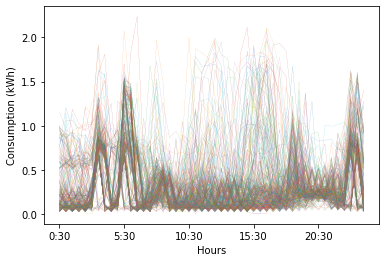

In [45]:
plt.figure(figsize=(25,5))
ax = gc[1.0].plot(linewidth=0.1)
ax.set_ylabel('Consumption (kWh)')
ax.set_xlabel('Hours')
ax.get_legend().remove()
plt.show()

### 2. Daily energy generation

In [46]:
gg_d=df[df['Consumption Category']=="GG"]

In [47]:
gg=gg_d.drop(columns=["Generator Capacity", "Postcode", "Consumption Category", "date"]).transpose()

In [48]:
#Dropping header
gg.columns = gg.iloc[0]
gg.drop(gg.index[0], inplace=True)

In [49]:
gg[1.0].head()

Customer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1800x360 with 0 Axes>

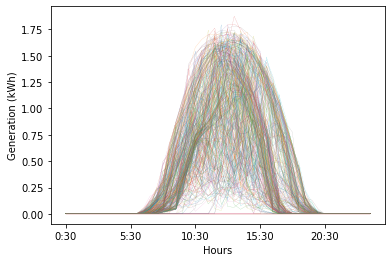

In [50]:
plt.figure(figsize=(25,5))
ax = gg[1.0].plot(linewidth=0.1)
ax.set_ylabel('Generation (kWh)')
ax.set_xlabel('Hours')
ax.get_legend().remove()
plt.show()

In [51]:
gc

Customer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
0:30,0.855,0.309,0.092,0.081,0.445,0.056,0.497,0.171,0.517,0.994,...,0.845,0.621,0.621,0.142,0.150,0.124,0.250,0.548,0.171,0.150
1:00,0.786,0.082,0.076,0.082,0.255,0.105,0.203,0.253,0.190,0.738,...,0.247,0.646,0.293,0.125,0.135,0.157,0.153,0.817,0.832,0.158
1:30,0.604,0.059,0.318,0.306,0.138,0.289,0.107,0.148,0.285,0.616,...,0.190,0.610,0.718,0.150,0.172,0.131,0.191,0.155,0.440,0.157
2:00,0.544,0.097,0.088,0.098,0.115,0.103,0.058,0.441,0.190,0.857,...,0.208,0.379,0.388,0.113,0.142,0.150,0.152,0.187,0.745,0.137
2:30,0.597,0.290,0.061,0.725,0.071,0.043,0.090,0.154,0.268,0.615,...,0.184,0.277,0.206,0.145,0.140,0.150,0.176,0.171,0.149,0.163
3:00,0.612,0.155,0.160,1.046,0.406,0.159,0.372,0.220,0.510,0.677,...,1.060,0.242,0.189,0.966,1.006,0.991,1.019,1.018,0.186,0.135
3:30,1.245,0.703,0.950,1.584,0.736,0.700,0.728,0.800,1.122,1.275,...,1.001,0.219,0.208,0.932,0.935,0.955,0.946,0.984,0.149,0.167
4:00,0.665,0.688,0.692,1.810,0.671,0.939,0.679,0.635,0.698,1.332,...,0.289,0.251,0.189,0.222,0.225,0.202,0.252,0.219,0.175,0.150
4:30,0.076,0.044,0.045,0.815,0.085,0.060,0.057,0.385,0.099,0.198,...,0.210,0.229,0.212,0.123,0.157,0.223,0.162,0.179,0.172,0.148
5:00,0.140,0.395,0.158,0.150,0.122,0.141,0.157,0.109,0.137,0.128,...,0.186,0.219,0.206,0.143,0.122,0.800,0.187,0.167,0.156,0.167


In [52]:
df

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/07/2012,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/07/2012,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/07/2012,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/07/2012,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/07/2012,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,29/06/2013,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,NaN
268553,300,3.36,2086,GG,29/06/2013,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
268554,300,3.36,2086,CL,30/06/2013,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,NaN
268555,300,3.36,2086,GC,30/06/2013,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,NaN


In [61]:
postcode_d = df[df['Consumption Category']=="GG"].sort_values(['Postcode'], ascending=[False])
postcode_d['Postcode'].value_counts()

2259    10139
2261     7665
2290     4745
2093     3285
2262     2920
        ...  
2207      365
2294      365
2039      365
2330      365
2047      365
Name: Postcode, Length: 100, dtype: int64

In [75]:
#Get unique postcode:
postcode_u=sorted(df['Postcode'].unique())
len(postcode_u)

100

Creating new csv for matching postcodes with longtitude and lattitude.\
We will use weather information DarkSky API, it needs only Longtitude and lattitude.

In [73]:
with open('postcodes.csv', 'w', newline='') as file_p:
    wr = csv.writer(file_p, quoting=csv.QUOTE_ALL, delimiter='\n')
    wr.writerow(postcode_u)